In [1]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('../../Datasets/NFLX.csv') 
data.head()


,Date,Open,High,Low,Close,Volume
0,2005-01-03,12.48,12.60,11.52,11.92,1619200
1,2005-01-04,11.92,11.95,11.25,11.66,2478900
2,2005-01-05,11.74,11.74,11.09,11.20,1818900
3,2005-01-06,11.20,11.37,11.01,11.05,1181900
4,2005-01-07,11.11,11.55,11.00,11.12,1070100


In [3]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High    Low  Close   Volume
0  2005-01-03  12.48  12.60  11.52  11.92  1619200
1  2005-01-04  11.92  11.95  11.25  11.66  2478900
2  2005-01-05  11.74  11.74  11.09  11.20  1818900
3  2005-01-06  11.20  11.37  11.01  11.05  1181900
4  2005-01-07  11.11  11.55  11.00  11.12  1070100


In [4]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date    Open      High      Low   Close   Volume  MA for 5 days  \
0     2005-01-03   12.48   12.6000   11.520   11.92  1619200            NaN   
1     2005-01-04   11.92   11.9500   11.250   11.66  2478900            NaN   
2     2005-01-05   11.74   11.7400   11.090   11.20  1818900            NaN   
3     2005-01-06   11.20   11.3700   11.010   11.05  1181900            NaN   
4     2005-01-07   11.11   11.5500   11.000   11.12  1070100         11.390   
...          ...     ...       ...      ...     ...      ...            ...   
2512  2014-12-24  336.51  343.4900  335.990  342.10   773201        337.950   
2513  2014-12-26  341.91  346.3895  339.740  340.05  1263921        339.076   
2514  2014-12-29  335.79  343.7300  333.570  341.93  1229798        339.438   
2515  2014-12-30  341.00  343.9800  339.772  343.23  1001603        340.748   
2516  2014-12-31  343.23  345.7400  341.510  341.61  1232539        341.784   

      MA for 10 days  MA for 20 days  MA for 50 day

,count,mean,std,min,25%,50%,75%,max
Open,2517.0,1.181233e+02,1.267937e+02,9.100000,2.637000e+01,5.607000e+01,1.840500e+02,4.863000e+02
High,2517.0,1.202221e+02,1.284864e+02,9.220000,2.688000e+01,5.700000e+01,1.874000e+02,4.892867e+02
Low,2517.0,1.160558e+02,1.249738e+02,8.910000,2.574000e+01,5.491000e+01,1.810000e+02,4.796700e+02
Close,2517.0,1.182183e+02,1.268121e+02,9.030000,2.637000e+01,5.596000e+01,1.845800e+02,4.843900e+02
Volume,2517.0,3.060798e+06,3.190191e+06,213400.000000,1.173800e+06,2.060300e+06,3.839500e+06,4.507740e+07
MA for 5 days,2513.0,1.181251e+02,1.266375e+02,9.176000,2.630800e+01,5.615200e+01,1.846460e+02,4.801680e+02
MA for 10 days,2508.0,1.180107e+02,1.264350e+02,9.238000,2.627625e+01,5.657500e+01,1.844327e+02,4.780820e+02
MA for 20 days,2498.0,1.177904e+02,1.260333e+02,9.753000,2.602063e+01,5.676050e+01,1.840828e+02,4.753845e+02
MA for 50 days,2468.0,1.169900e+02,1.244894e+02,10.549000,2.621785e+01,5.641194e+01,1.816071e+02,4.606940e+02
EMA for 5 days,2517.0,1.179568e+02,1.265660e+02,9.166464,2.629898e+01,5.627720e+01,1.839278e+02,4.803845e+02


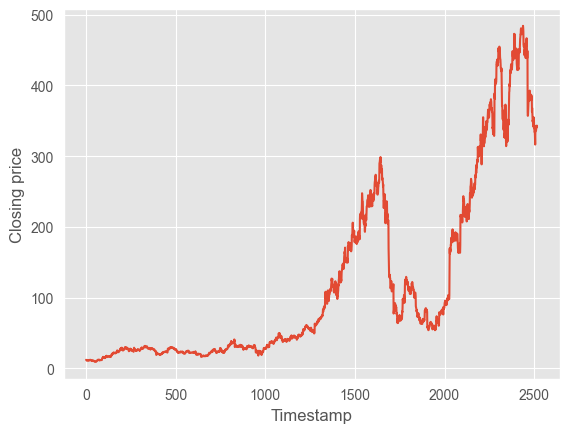

In [5]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [6]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2005-03-15,9.47,9.62,9.12,9.20,1505100,9.606,10.068,10.3665,10.9282,9.589113,9.913983,10.289715,10.825425,34.482759,-0.431601
50,2005-03-16,9.11,9.32,9.10,9.17,1037200,9.438,9.917,10.2625,10.8732,9.449408,9.778714,10.183075,10.760506,29.568106,-0.466545
51,2005-03-17,9.22,9.24,9.15,9.20,650700,9.300,9.781,10.1750,10.8240,9.366272,9.673493,10.089449,10.699310,13.469388,-0.486213
52,2005-03-18,9.25,9.25,9.15,9.20,997600,9.254,9.631,10.1100,10.7840,9.310848,9.587403,10.004740,10.640513,15.277778,-0.496081
53,2005-03-21,9.25,9.50,9.16,9.31,884900,9.216,9.503,10.0420,10.7492,9.310565,9.536966,9.938574,10.588336,16.055046,-0.489385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2007-03-05,22.01,22.16,21.05,21.06,2443000,22.162,22.812,22.8400,23.6432,22.106463,22.480152,22.780457,23.662933,33.492823,-0.397707
545,2007-03-06,21.25,21.91,20.91,21.44,2019000,22.030,22.605,22.7820,23.5308,21.884308,22.291033,22.652794,23.575759,38.629283,-0.457407
546,2007-03-07,21.50,21.60,21.07,21.18,1228500,21.760,22.384,22.7250,23.4072,21.649539,22.089027,22.512528,23.481808,38.871473,-0.519708
547,2007-03-08,21.21,21.63,21.21,21.24,902900,21.442,22.133,22.6420,23.2962,21.513026,21.934659,22.391335,23.393894,40.063091,-0.557811


In [7]:
# updated Code

feature_columns = [
    'Close',          # Most important feature (direct price information)
    'Low',            # Important price-related feature
    'High',           # Important price-related feature
    'Open',           # Important price-related feature
    'EMA for 5 days', # Short-term trend indicator
    'MA for 5 days',  # Short-term trend indicator
    'RSI_14'          # Momentum indicator
]

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" relative to the first_close
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                # For other features, normalize them directly (or use their raw values if normalization isn't required)
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features for this time step
        temp.append(normalized_features)
    
    # Calculate the target (normalized change in "Close" price)
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  # Each sample has shape (window_size, len(feature_columns))
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshaping the data for CNN models
# Assuming train_X has shape (num_samples, window_size, num_features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (1960, 15, 7)
Shape of train_X after reshaping: (1960, 1, 15, 7)
Shape of test_X after reshaping: (491, 1, 15, 7)
Number of training samples: 1960
Number of testing samples: 491


In [8]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [9]:
from keras.models import load_model

# load the model
model = load_model('improved_cnn_lstm_model.keras')

c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 36 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.802235
R2 Score: 0.802235
Max Error: 0.552515


In [11]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [12]:
from scipy.signal import savgol_filter

def plot_predictions(test_label, predicted, title="Actual V Stock Price Prediction"):
    # Apply smoothing to both lines
    window_length = 5  # Must be odd; adjust this value to control smoothing amount
    polyorder = 1
    
    # Smooth both actual and predicted values
    test_label_smooth = savgol_filter(test_label.flatten(), window_length, polyorder)
    predicted_smooth = savgol_filter(predicted.flatten(), window_length, polyorder)
    
    plt.figure(figsize=(15, 6))
    
    # Plot smoothed lines
    plt.plot(test_label_smooth, label='Actual Price', color='red')
    plt.plot(predicted_smooth, label='Predicted Price', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

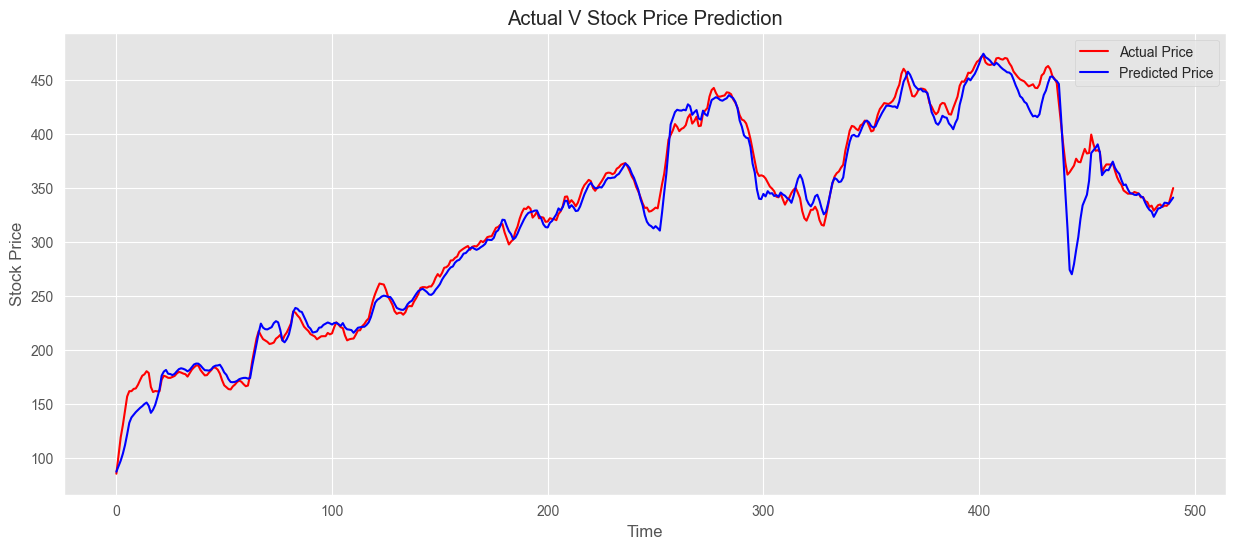

In [13]:
plot_predictions(test_label, predicted, "Actual V Stock Price Prediction")

In [18]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 327.3167292016397
Root Mean Squared Error (RMSE): 18.09189678285944
Mean Absolute Error (MAE): 11.710104612297062
Mean Absolute Percentage Error (MAPE): 3.90%


Text(0, 0.5, 'Closing price')

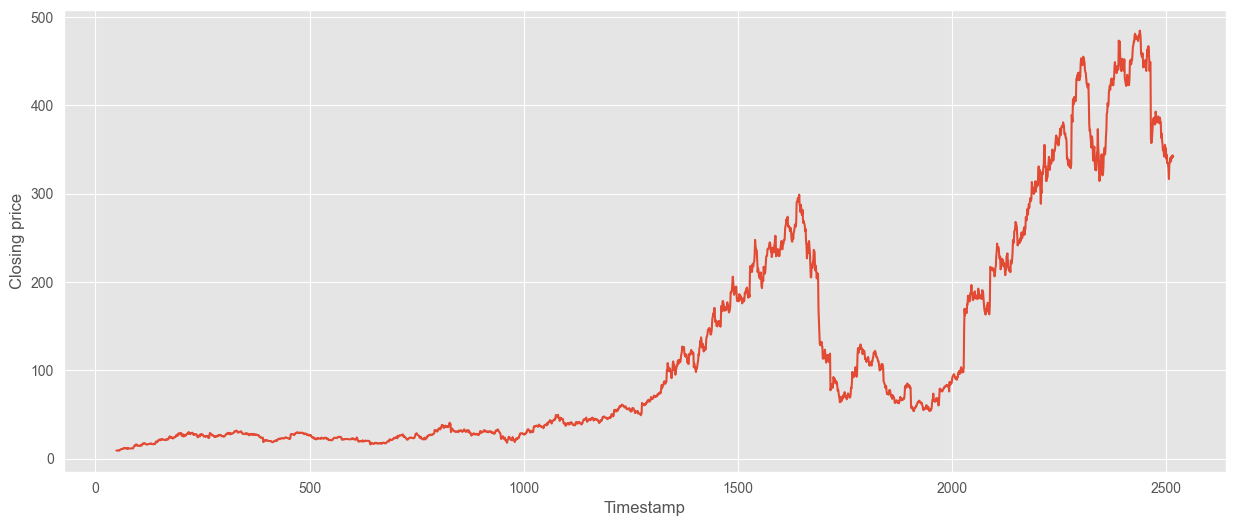

In [19]:
# plot the full dataset

plt.figure(figsize=(15, 6))
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")


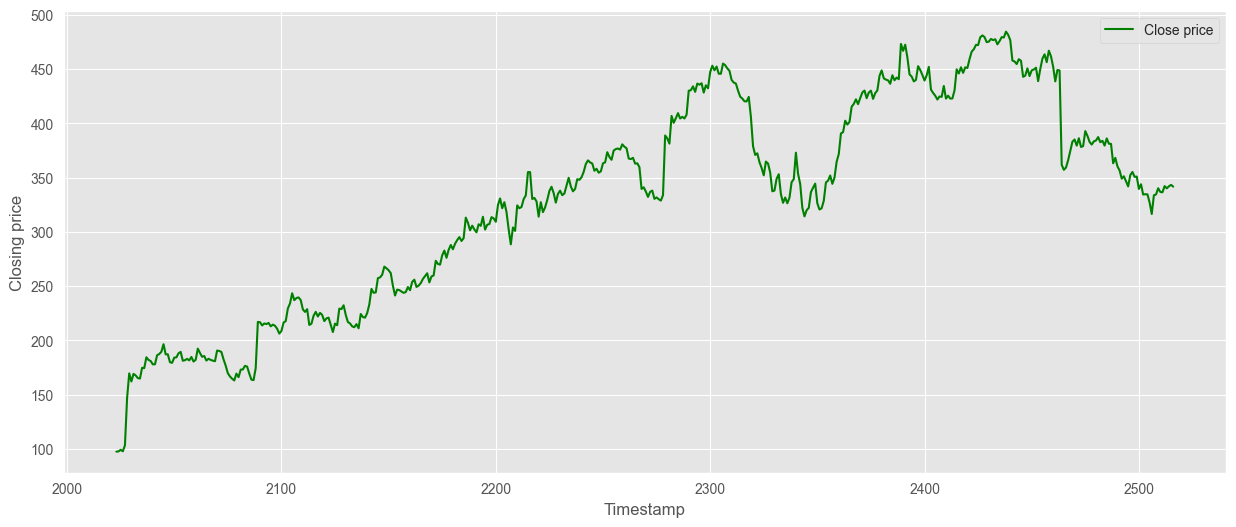

In [20]:
# Plot the last 20% of the data

plt.figure(figsize=(15, 6))
last_20_percent = data['Close'].iloc[int(len(data) * 0.8):]
plt.plot(last_20_percent.index, last_20_percent.values, label="Close price", color='green')
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.legend()

In [17]:
# save the model
model.save('improved_cnn_lstm_model.h5')